<a href="https://colab.research.google.com/github/bnv20/cakd3/blob/main/dl_advanced_usage_of_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* 순환 드롭아웃 : 순환 층에서 과대적합을 방지하기 위해 케라스에 내장되어 있는 드롭아웃을 사용합니다.
* 순환 층 스태킹 : 네트워크의 표현 능력을 증가시킵니다(대신 계산 비용이 많이 듭니다).
* 양방향 순환 층 : 순환 네트워크에 같은 정보를 다른 방향으로 주입하여 정확도를 높이고 기억을 좀 더 오래 유지시킵니다.


막스 플랑크 생물지구화학 연구소( http://www.bgc-jena.mpg.de/wetter/ )의 지상 관측소에서 수집한 것

In [ ]:
!mkdir jena_climate

In [ ]:
!ls

drive  jena_climate  sample_data


In [ ]:
%cd jena_climate/

/content/jena_climate


In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2021-10-27 01:40:05--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.49.43
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.49.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  12.6MB/s    in 1.0s    

2021-10-27 01:40:06 (12.6 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]



In [ ]:
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
!ls

jena_climate_2009_2016.csv  jena_climate_2009_2016.csv.zip  __MACOSX


In [ ]:
!mkdir /content/drive/MyDrive/cakd3_colab/dl_keras/datasets/jena_climate/

In [ ]:
!pwd

/content/jena_climate


In [ ]:
!cp ./jena_climate_2009_2016.csv /content/drive/MyDrive/cakd3_colab/dl_keras/datasets/jena_climate/

In [1]:
import os

data_dir = '/content/drive/MyDrive/cakd3_colab/dl_keras/datasets/jena_climate/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:] # exclude header 

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/cakd3_colab/dl_keras/datasets/jena_climate/jena_climate_2009_2016.csv')
df.head()
# df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
len(header)

15

In [5]:
lines[:5]

['01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30',
 '01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10',
 '01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60',
 '01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00',
 '01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30']

In [7]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i,:] = values

print(float_data.shape)
float_data[0,:]

(420451, 14)


array([ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
        9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
        1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
        1.75000e+00,  1.52300e+02])

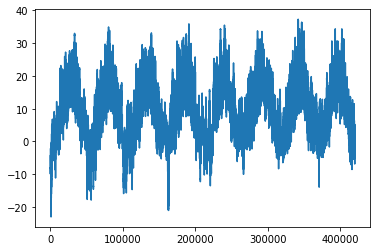

In [8]:
import matplotlib.pyplot as plt

temp = float_data[:,1] # 온도(섭씨)
plt.plot(range(len(temp)), temp)
plt.show()

In [9]:
# 처음 10일간의 온도 데이터
print(24*60/10)

144.0


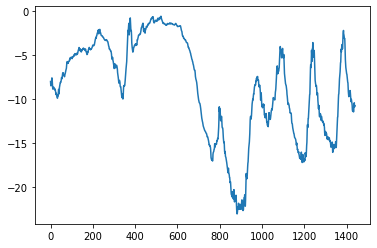

In [10]:
plt.plot(range(1440), temp[:1440])
plt.show()

In [11]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std 

In [12]:
float_data.shape

(420451, 14)

* `lookback` : 입력으로 사용하기 위해 거슬러 올라갈 타임스텝
* `delay` : 타깃으로 사용할 미래의 타임스텝
* `min_index`와 `max_index` : 추출할 타임스텝의 범위를 지정하기 위한 `data` 배열의 인덱스. 검증 데이터와 테스트 데이터를 분리하는 데 사용합니다.
* `shuffle` : 샘플을 섞을지 시간 순서대로 추출할지 결정합니다.
* `batch_size` : 배치의 샘플 수
* `step` : 데이터를 샘플링할 타임스텝 간격. 한 시간에 하나의 데이터 포인트를 추출하기 위해 6으로 지정하겠습니다.

In [13]:
# 시계열 데이터와 타깃을 반환하는 제너레이터 함수
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [14]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 0,
                      max_index = 200000,
                      shuffle = True,
                      step = step,
                      batch_size = batch_size)

val_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 200001,
                      max_index = 300000,                      
                      step = step,
                      batch_size = batch_size)
test_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 300001,
                      max_index = None,                      
                      step = step,
                      batch_size = batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size # val_gen에서 추출할 횟수

test_steps = (len(float_data) - 300001 - lookback) // batch_size

print(val_steps)
print(test_steps)

769
929


In [15]:
# 상식적인 기준점 
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


In [16]:
# 섭씨 2.57°C
0.29*std[1]

2.5672247338393395

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                    steps_per_epoch=500, # 훈련 샘플 수 / 배치 사이즈
                    epochs = 20,
                    validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 19s 37ms/step - loss: 1.5920 - val_loss: 0.8959
Epoch 2/20
500/500 [==============================] - 20s 40ms/step - loss: 0.5764 - val_loss: 0.3439
Epoch 3/20
500/500 [==============================] - 17s 33ms/step - loss: 0.3161 - val_loss: 0.3443
Epoch 4/20
500/500 [==============================] - 19s 38ms/step - loss: 0.2758 - val_loss: 0.2977
Epoch 5/20
500/500 [==============================] - 19s 38ms/step - loss: 0.2591 - val_loss: 0.3365
Epoch 6/20
500/500 [==============================] - 19s 38ms/step - loss: 0.2518 - val_loss: 0.3140
Epoch 7/20
500/500 [==============================] - 17s 33ms/step - loss: 0.2419 - val_loss: 0.3186
Epoch 8/20
500/500 [==============================] - 17s 34ms/step - loss: 0.2342 - val_loss: 0.3366
Epoch 9/20
500/500 [==============================] - 20s 40ms/step - loss: 0.2300 - val_loss: 0.3133
Epoch 10/20
500/500 [==============================] - 20s 40ms/step - loss: 0.225

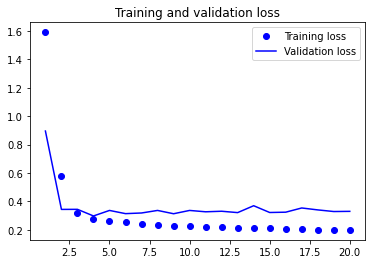

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

일부 검증 손실은 학습을 사용하지 않은 기준점에 가깝지만 안정적이지 못함.


[과제]
- GRU 층을 사용
- 과대적합을 감소시키기 위해 순환 드롭아웃 사용
- 스태킹 순환 층(GRU Layer 추가)